# Mini projekt PAD - scrapper danych o oponach
## Jakub Michalak S20034
### Opis projektu
- Projekt polega na pobraniu danych o oponach z dwóch sklepów internetowych: sklep opon i oponeo
- Opony są pobierane w rozmiarze 205/55R16 i sezonie zimowym
- Dane pobrane z obu sklepów zostaną zapisane w plikach CSV
- Dane zostaną oczyszczone i przygotowane do analizy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from scrappers.sklep_opon import scrap_sklep_opon
from scrappers.oponeo import scrap_oponeo
from common.file_utils import load_dataframe_from_csv_files

# 1. Scrapping danych
### 1.1. Konfiguracja drivera do scrapowania danych 
- **Uwaga**: testowane na szerokości okna 1110 pikseli
- Ustawienie szerokości okna na 1100 pikseli pozwala na poprawne działanie skryptów do scrapowania danych ze stron sklep opon i oponeo. Przy wyższej szerokości okna mogą wystąpić problemy z lokalizacją elementów na stronie (np. oceny).

In [4]:
download_service = Service()
driver = webdriver.Chrome(service=download_service)
driver.set_window_size(1100, 800)

### 1.2. Pobieranie danych ze strony sklep opon

In [9]:
scrap_sklep_opon(driver)

Proces scrapowania zakończony.


### 1.3. Pobieranie danych ze strony oponeo

In [5]:
scrap_oponeo(driver)

Rozpoczynam scrapowanie dla rozmiaru: 185/60R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_185_60_16.csv
Zapisano aktualny rozmiar: 185/60R16
Zapisano ostatni rozmiar: 185/60R16
Rozpoczynam scrapowanie dla rozmiaru: 195/45R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_45_16.csv
Zapisano aktualny rozmiar: 195/45R16
Zapisano ostatni rozmiar: 195/45R16
Rozpoczynam scrapowanie dla rozmiaru: 195/50R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_50_16.csv
Zapisano aktualny rozmiar: 195/50R16
Zapisano ostatni rozmiar: 195/50R16
Rozpoczynam scrapowanie dla rozmiaru: 195/60R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_60_16.csv
Zapisano aktualny rozmiar: 195/60R16
Zapisano ostatni

### 1.4. Zamknięcie drivera po scrapowaniu danych

In [5]:
driver.quit()

### 1.5. Odczyt danych z plików CSV

In [12]:
df_sklep_opon = load_dataframe_from_csv_files("data/sklep_opon")
display(df_sklep_opon)
df_oponeo = load_dataframe_from_csv_files("data/oponeo")
display(df_oponeo)

Ładowanie pliku: data/sklep_opon\sklep_opon_185_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_185_55R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_185_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_45R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_65R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_40R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_45R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_45R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_50R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_55R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_55R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_65R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_215_35R18.csv
Ładowanie plik

,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability
0,BluEarth-A AE-50 185/50 R16 81 H,Yokohama,BluEarth-A AE-50,185/50 R16,81.0,H,D,C,B,68.0,Premium,5.8,460.01,full
1,Nfera Primus 185/50 R16 81 V,Nexen,Nfera Primus,185/50 R16,81.0,V,C,A,B,70.0,Średnia,5.4,384.24,full
2,RPX800 185/50 R16 85 V,Radar,RPX800,185/50 R16,85.0,V,C,B,B,70.0,Ekonomiczna,5.2,270.59,full
3,Ziex ZE310 Ecorun 185/50 R16 81 V,Falken,Ziex ZE310 Ecorun,185/50 R16,81.0,V,D,A,B,70.0,Średnia,5.5,398.48,full
4,AdvanteX TC101 185/50 R16 81 V,Triangle,AdvanteX TC101,185/50 R16,81.0,V,D,C,B,70.0,NaN,4.2,239.47,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21094,Scorpion Verde All Season 295/45 R19 113 W,Pirelli,Scorpion Verde All Season,295/45 R19,113.0,W,B,B,A,70.0,Premium,5.1,1132.08,medium
21095,Pilot Sport 4 SUV 295/45 R19 113 Y,Michelin,Pilot Sport 4 SUV,295/45 R19,113.0,Y,C,A,B,74.0,Premium,5.7,1070.29,medium
21096,Ventus S1 evo3 K127 295/45 R19 113 Y,Hankook,Ventus S1 evo3 K127,295/45 R19,113.0,Y,C,A,B,75.0,Premium,5.3,540.00,last
21097,Scorpion Verde All Season 295/45 R19 113 W,Pirelli,Scorpion Verde All Season,295/45 R19,113.0,W,B,B,A,70.0,Premium,5.1,1124.21,last


Ładowanie pliku: data/oponeo\oponeo_185_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_185_55_16.csv
Ładowanie pliku: data/oponeo\oponeo_185_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_45_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_65_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_40_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_45_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_45_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_50_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_55_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_55_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_65_16.csv
Ładowanie pliku: data/oponeo\oponeo_215_35_18.csv
Ładowanie pliku: data/oponeo\oponeo_215_40_17.csv
Ładowanie pliku: data/oponeo\oponeo_215_40_18.csv
Ładowanie pliku: data/oponeo\oponeo_215_45_16.csv


,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
2,Continental UltraContact 185/50 R16 81 H FR,Continental,UltraContact,185/50 R16,81.0,H,C,A,B,70.0,Premium,4.7,539.0,medium
3,Firemax FM601 185/50 R16 81 V,Firemax,FM601,185/50 R16,81.0,V,D,B,B,69.0,Ekonomiczna,4.3,164.0,full
4,Barum Bravuris 5HM 185/50 R16 81 V,Barum,Bravuris 5HM,185/50 R16,81.0,V,D,B,B,70.0,Ekonomiczna,4.4,269.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
14342,Hankook Ventus S1 Evo3 SUV K127A 295/45 R19 11...,Hankook,Ventus S1 Evo3 SUV K127A,295/45 R19,113.0,Y,C,A,B,75.0,Średnia,4.6,616.0,full
14343,Michelin Pilot Sport 4 SUV 295/45 R19 113 Y XL,Michelin,Pilot Sport 4 SUV,295/45 R19,113.0,Y,C,A,B,74.0,Premium,4.8,976.0,medium
14344,Pirelli Scorpion Verde All Season 295/45 R19 1...,Pirelli,Scorpion Verde All Season,295/45 R19,113.0,W,B,B,A,70.0,Premium,4.4,1109.0,medium


### 1.6. Weryfikacja poprawnych wartości w każdej kolumnie

In [13]:
print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_sklep_opon[column].unique())
print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_oponeo[column].unique())

sklep opon
typy danych w kolumnach
name               object
brand              object
model              object
size               object
load_index        float64
speed_index        object
fuel_index         object
wet_grip_index     object
noise_index        object
noise_level       float64
class              object
user_rating       float64
price             float64
availability       object
dtype: object
unikalne wartości w kolumnach
size ['185/50 R16' '185/55 R16' '185/60 R16' '195/45 R16' '195/50 R16'
 '195/60 R16' '195/65 R16' '205/40 R17' '205/45 R16' '205/45 R17'
 '205/50 R16' '205/50 R17' '205/55 R16' '205/55 R17' '205/60 R16'
 '205/65 R16' '215/35 R18' '215/40 R17' '215/40 R18' '215/45 R16'
 '215/45 R17' '215/45 R18' '215/50 R17' '215/50 R18' '215/55 R16'
 '215/55 R17' '215/55 R18' '215/60 R16' '215/60 R17' '215/65 R16'
 '215/65 R17' '225/35 R18' '225/35 R19' '225/40 R18' '225/40 R19'
 '225/45 R17' '225/45 R18' '225/45 R19' '225/50 R16' '225/50 R17'
 '225/50 R18' '225/50 R1

# 2. Czyszczenie i przygotowanie danych

### 2.1. konwersja kolumn do typów numerycznych i typu category

In [3]:
def update_column_types(param_df):
    param_df['noise_level'] = pd.to_numeric(param_df['noise_level'], errors='coerce').astype('Int64')
    param_df['user_rating'] = pd.to_numeric(param_df['user_rating'], errors='coerce').astype(float)
    param_df['price'] = param_df['price'].replace({' ': ''}, regex=True)
    param_df['price'] = pd.to_numeric(param_df['price'], errors='coerce').astype(float)
    param_df['size'] = param_df['size'].astype('category')
    param_df['load_index'] = param_df['load_index'].astype('category')
    param_df['speed_index'] = param_df['speed_index'].astype('category')
    param_df['fuel_index'] = param_df['fuel_index'].astype('category')
    param_df['wet_grip_index'] = param_df['wet_grip_index'].astype('category')
    param_df['noise_index'] = param_df['noise_index'].astype('category')
    param_df['class'] = param_df['class'].astype('category')
    param_df['availability'] = param_df['availability'].astype('category')
    param_df['user_rating'] = param_df['user_rating'].astype('float32')

In [14]:
df_sklep_opon['speed_index'] = df_sklep_opon['speed_index'].replace({'(Y)': 'Y'})
update_column_types(df_oponeo)
update_column_types(df_sklep_opon)

### 2.2. Funkcje pomocnicze

In [5]:
def find_closest_key(value, param_map):
        closest_key = min(param_map, key=lambda k: abs(param_map[k] - value))
        return closest_key

def find_closest_value(value, param_map):
        closest_key = min(param_map, key=lambda k: abs(param_map[k] - value))
        return param_map[closest_key]

### 2.3. Uzupełnianie noise_index na podstawie noise_level

In [15]:
def update_noise_index_column(df):
    grouped_noise_index = df.groupby('noise_index', observed=False)['noise_level'].mean().round().astype(int)
    
    if 'C' not in grouped_noise_index:
        if 'B' in grouped_noise_index and 'A' in grouped_noise_index:
            grouped_noise_index['C'] = grouped_noise_index['B'] + (grouped_noise_index['B'] - grouped_noise_index['A'])
    
    noise_map = grouped_noise_index.to_dict()
    
    def apply_update_noise_index(row):
        if pd.notna(row['noise_level']) and pd.isna(row['noise_index']):
            return find_closest_key(row['noise_level'], noise_map)
        return row['noise_index']
    
    df['noise_index'] = df.apply(apply_update_noise_index, axis=1)
    
    return df

df_oponeo = update_noise_index_column(df_oponeo)
df_sklep_opon = update_noise_index_column(df_sklep_opon)

print("Zaktualizowano noise_index")
print(df_oponeo['noise_index'].unique())
print(df_sklep_opon['noise_index'].unique())

Zaktualizowano noise_index
[nan 'B' 'A' 'C']
['B' nan 'A' 'C']


### 2.4. Uzupełnianie ceny na podstawie średniej ceny i klasy na podstawie ceny

In [16]:
def update_price_column(param_df):
    class_price_map = param_df.groupby('class', observed=False)['price'].mean().to_dict()
    
    def apply_update_price(row):
        if pd.isna(row['price']):
            return find_closest_value(row['price'], class_price_map)
        return row['price']
    
    def apply_update_class(row):
        if pd.isna(row['class']):
            return find_closest_key(row['price'], class_price_map)
        return row['class']
    
    param_df['price'] = param_df.apply(apply_update_price, axis=1)
    param_df['class'] = param_df.apply(apply_update_class, axis=1)
    
    return param_df

df_oponeo = update_price_column(df_oponeo)
df_sklep_opon = update_price_column(df_sklep_opon)

print("Zaktualizowano cenę i klasę")
print("oponeo")
print(df_oponeo['price'].unique())
print(df_oponeo['class'].unique())
print("sklep opon")
print(df_sklep_opon['price'].unique())
print(df_sklep_opon['class'].unique())

Zaktualizowano cenę i klasę
oponeo
[ 416.05413422  539.          164.         ... 1753.         1837.
 1109.        ]
['Ekonomiczna' 'Premium' 'Średnia']
sklep opon
[ 460.01  384.24  270.59 ... 1070.29 1124.21  640.3 ]
['Premium' 'Średnia' 'Ekonomiczna']


### 2.5. Usunięcie brakujących wartości i ponowna weryfikacja wartości w kolumnach

In [17]:
df_sklep_opon = df_sklep_opon.dropna(subset=['load_index'])
df_sklep_opon = df_sklep_opon.dropna(subset=['fuel_index'])
df_sklep_opon = df_sklep_opon.dropna(subset=['wet_grip_index'])
df_sklep_opon = df_sklep_opon.dropna(subset=['noise_index'])
df_sklep_opon = df_sklep_opon.dropna(subset=['noise_level'])
df_sklep_opon['user_rating'] = df_sklep_opon['user_rating'].fillna(0)

df_oponeo = df_oponeo.dropna(subset=['load_index'])
df_oponeo = df_oponeo.dropna(subset=['speed_index'])
df_oponeo = df_oponeo.dropna(subset=['fuel_index'])
df_oponeo = df_oponeo.dropna(subset=['wet_grip_index'])
df_oponeo = df_oponeo.dropna(subset=['noise_index'])
df_oponeo = df_oponeo.dropna(subset=['noise_level'])
df_oponeo['load_index'] = df_sklep_opon['load_index'].cat.rename_categories({'108/106': '106'})
df_oponeo['user_rating'] = df_sklep_opon['user_rating'].fillna(0)

print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model", "price", "size"]:
        print(column, df_sklep_opon[column].unique().tolist())
print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model", "price", "size"]:
        print(column, df_oponeo[column].unique().tolist())

sklep opon
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index         object
noise_level          Int64
class               object
user_rating        float32
price              float64
availability      category
dtype: object
unikalne wartości w kolumnach
load_index [81.0, 85.0, 83.0, 87.0, 86.0, 84.0, 80.0, 88.0, 89.0, 99.0, 93.0, 104.0, 100.0, 92.0, 91.0, 94.0, 95.0, 96.0, 107.0, 103.0, 90.0, 97.0, 98.0, 109.0, 108.0, 102.0, 106.0, 101.0, 105.0, 111.0, 112.0, 121.0, 118.0, 116.0, 115.0, 117.0, 110.0, 114.0, 113.0]
speed_index ['H', 'V', 'T', 'W', 'R', 'Y', 'N', 'S', 'Q']
fuel_index ['D', 'C', 'B', 'A', 'E']
wet_grip_index ['C', 'A', 'B', 'D', 'E']
noise_index ['B', 'A', 'C']
noise_level [68, 70, 71, 69, 67, 66, 72, 73, 65, 74, 75]
class ['Premium', 'Średnia', 'Ekonomiczna']
user_rating 

### 2.6. Znalezienie, uzupełnienie i usunięcie duplikatów
- Funkcja do identyfikacji duplikatów na podstawie 'name', 'brand', 'model' i wypełniania brakujących danych
- Usuwa duplikaty na podstawie ilości uzupełnionych kolumn - zostawia wiersz z największą ilością uzupełnionych kolumn

In [18]:
def fill_missing_with_duplicates(df_param):
    columns_subset = ['name', 'brand', 'model', 'size']
    duplicates = df_param[df_param.duplicated(subset=columns_subset, keep=False)]
    
    for idx, group in duplicates.groupby(columns_subset, observed=True):  # Dodano observed=True
        for col in df_param.columns:
            if group[col].isna().any():
                # Jeśli mamy wartości do wypełnienia, to szukamy pierwszej dostępnej wartości
                fill_value = group[col].dropna().iloc[0] if not group[col].dropna().empty else None
                if fill_value is not None:  # Tylko wypełniaj, jeśli fill_value nie jest None
                    df_param.loc[group.index, col] = df_param.loc[group.index, col].fillna(fill_value)

    df_param['non_nan_count'] = df_param.notna().sum(axis=1)
    
    # Sprawdzenie, czy grupa nie jest pusta przed idxmax()
    group_max_idx = df_param.groupby(columns_subset, observed=True)['non_nan_count'].apply(
        lambda x: x.idxmax() if not x.empty else None
    ).dropna()
    
    df_param = df_param.loc[group_max_idx]
    df_param.drop(columns=['non_nan_count'], inplace=True)
    
    return df_param

print("Przed usunięciem duplikatów")
print("sklep opon: ", df_sklep_opon.shape)
print("oponeo: ", df_oponeo.shape)

df_sklep_opon = fill_missing_with_duplicates(df_sklep_opon)
df_oponeo = fill_missing_with_duplicates(df_oponeo)

print("Po usunięciu duplikatów")
print("sklep opon: ", df_sklep_opon.shape)
print("oponeo: ", df_oponeo.shape)

Przed usunięciem duplikatów
sklep opon:  (16395, 14)
oponeo:  (12205, 14)
Po usunięciu duplikatów
sklep opon:  (11164, 14)
oponeo:  (11133, 14)


### 2.7. Wyświetlenie danych po czyszczeniu i zapisanie do plików CSV

In [21]:
print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_sklep_opon[column].unique())
display(df_sklep_opon)

print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_oponeo[column].unique())
display(df_oponeo)

df_oponeo.to_csv("data/cleaned/oponeo.csv", index=False)
df_sklep_opon.to_csv("data/cleaned/sklep_opon.csv", index=False)

sklep opon
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index       category
noise_level          Int64
class             category
user_rating        float32
price              float64
availability      category
retailer            object
dtype: object
unikalne wartości w kolumnach
size ['195/65 R16', '225/65 R16', '225/75 R16', '255/55 R18', '215/55 R18', ..., '245/55 R18', '265/45 R19', '295/40 R19', '225/50 R19', '295/45 R19']
Length: 129
Categories (129, object): ['185/50 R16', '185/55 R16', '185/60 R16', '195/45 R16', ..., '295/30 R19', '295/35 R19', '295/40 R19', '295/45 R19']
load_index [104.0, 112.0, 118.0, 109.0, 99.0, ..., 115.0, 80.0, 113.0, 114.0, 85.0]
Length: 39
Categories (39, float64): [80.0, 81.0, 83.0, 84.0, ..., 116.0, 117.0, 118.0, 121.0]
speed_index ['R', 'V', 'H', 'W

,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability,retailer
0,101 195/65 R16 104/102 R,Orium,101,195/65 R16,104.0,R,D,C,B,72,Średnia,0.0,611.62,medium,Sklep opon
1,101 225/65 R16 112/110 R,Orium,101,225/65 R16,112.0,R,D,C,B,72,Premium,0.0,672.80,medium,Sklep opon
2,101 225/75 R16 118/116 R,Orium,101,225/75 R16,118.0,R,D,C,B,72,Średnia,0.0,648.08,medium,Sklep opon
3,4x4 Road 255/55 R18 109 V,Fulda,4x4 Road,255/55 R18,109.0,V,C,C,B,73,Średnia,4.7,567.21,full,Sklep opon
4,701 215/55 R18 99 V,Orium,701,215/55 R18,99.0,V,D,C,B,71,Premium,0.0,669.68,medium,Sklep opon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,iON ST AS IH61A 215/60 R17 96 V,Hankook,iON ST AS IH61A,215/60 R17,96.0,V,B,D,B,70,Premium,0.0,523.25,full,Sklep opon
11160,iON ST AS IH61A 225/55 R18 102 V,Hankook,iON ST AS IH61A,225/55 R18,102.0,V,B,D,B,70,Premium,0.0,634.24,full,Sklep opon
11161,iON ST AS IH61A 225/60 R18 104 W,Hankook,iON ST AS IH61A,225/60 R18,104.0,W,B,D,B,69,Premium,0.0,743.14,full,Sklep opon
11162,iON ST AS IH61A 235/55 R18 100 V,Hankook,iON ST AS IH61A,235/55 R18,100.0,V,B,D,B,70,Premium,0.0,591.50,full,Sklep opon


oponeo
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index       category
noise_level          Int64
class             category
user_rating        float32
price              float64
availability      category
retailer            object
dtype: object
unikalne wartości w kolumnach
size ['245/35 R19', '245/45 R19', '255/35 R18', '255/40 R17', '205/50 R17', ..., '195/65 R16', '225/75 R16', '225/65 R16', '295/45 R19', '245/55 R18']
Length: 129
Categories (129, object): ['185/50 R16', '185/55 R16', '185/60 R16', '195/45 R16', ..., '295/30 R19', '295/35 R19', '295/40 R19', '295/45 R19']
load_index [NaN, 103.0, 95.0, 96.0, 83.0, ..., 118.0, 80.0, 115.0, 111.0, 117.0]
Length: 37
Categories (36, float64): [80.0, 81.0, 83.0, 84.0, ..., 116.0, 117.0, 118.0, 121.0]
speed_index ['Y', 'W', 'H', 'V', 'T',

,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability,retailer
0,"Accelera PHI 245/35 R19 93 Y XL, ZR",Accelera,PHI,245/35 R19,NaN,Y,C,C,B,70,Ekonomiczna,NaN,564.0,medium,Oponeo
1,"Accelera PHI 245/45 R19 102 Y XL, ZR",Accelera,PHI,245/45 R19,103.0,Y,C,C,B,70,Ekonomiczna,5.1,629.0,medium,Oponeo
2,"Accelera PHI 255/35 R18 94 Y XL, ZR",Accelera,PHI,255/35 R18,95.0,Y,C,C,A,70,Ekonomiczna,5.1,502.0,medium,Oponeo
3,"Accelera PHI 255/40 R17 98 W XL, ZR",Accelera,PHI,255/40 R17,96.0,W,C,C,A,70,Ekonomiczna,5.1,473.0,medium,Oponeo
4,"Alliance 030EX 205/50 R17 93 W XL, RPB",Alliance,030EX,205/50 R17,83.0,W,C,C,B,71,Ekonomiczna,5.6,385.0,full,Oponeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128,Zeetex ZT1000 205/65 R16 95 V,Zeetex,ZT1000,205/65 R16,NaN,V,D,C,B,71,Średnia,NaN,371.0,full,Oponeo
11129,Zeetex ZT6000 eco 205/55 R16 91 V,Zeetex,ZT6000 eco,205/55 R16,84.0,V,D,C,B,71,Średnia,5.0,189.0,full,Oponeo
11130,Zeetex ZT6000 eco 205/60 R16 92 V,Zeetex,ZT6000 eco,205/60 R16,93.0,V,D,C,B,71,Średnia,4.8,204.0,full,Oponeo
11131,Zeetex ZT6000 eco 215/60 R16 95 V,Zeetex,ZT6000 eco,215/60 R16,NaN,V,D,C,B,71,Średnia,NaN,217.0,full,Oponeo


# 3. Eksploracyjna Analiza danych

- Opcjonalne ładowanie oczyszczonych danych z plików CSV jeżeli nie chcemy ponownie scrapować danych

In [4]:
df_oponeo = pd.read_csv("data/cleaned/oponeo.csv", delimiter=",")
df_sklep_opon = pd.read_csv("data/cleaned/sklep_opon.csv", delimiter=",")
update_column_types(df_oponeo)
update_column_types(df_sklep_opon)

df_oponeo['retailer'] = 'Oponeo'
df_sklep_opon['retailer'] = 'Sklep opon'
df = pd.concat([df_oponeo, df_sklep_opon], ignore_index=True)

### 3.1. Średnia, mediana, min i max cen opon w każdym sklepie

In [5]:
price_stats = df.groupby('retailer')['price'].agg(['mean', 'median', 'min', 'max'])
price_stats

,mean,median,min,max
retailer,,,,
Oponeo,549.879098,514.00,147.00,2870.00
Sklep opon,620.162906,524.99,156.77,7978.59


### 3.2. Średnia cena opon w zależności od marki i sklepu

In [6]:
brand_price_stats = df.groupby(['retailer', 'brand'])['price'].mean().unstack()
brand_price_stats

brand,Accelera,Alliance,Aplus,Apollo,Aptany,Arivo,Atlas Tires,Atturo,Austone,Autogreen,...,Vredestein,Wanli,Waterfall,West Lake,Westlake,Windforce,Winrun,Yartu,Yokohama,Zeetex
retailer,,,,,,,,,,,,,,,,,,,,,
Oponeo,542.0,370.25,381.768293,472.281250,343.0,366.157895,346.689655,605.0,415.702703,347.074074,...,578.200000,328.0,385.0,388.180952,NaN,373.842105,NaN,NaN,634.733728,309.452381
Sklep opon,NaN,NaN,NaN,480.104167,NaN,1214.126150,NaN,NaN,403.202872,336.028542,...,669.556757,NaN,NaN,NaN,362.272342,NaN,405.075238,316.439474,663.117774,NaN


### 3.3. Średnia cena opon Michelin w zależności od sklepu i rozmiaru

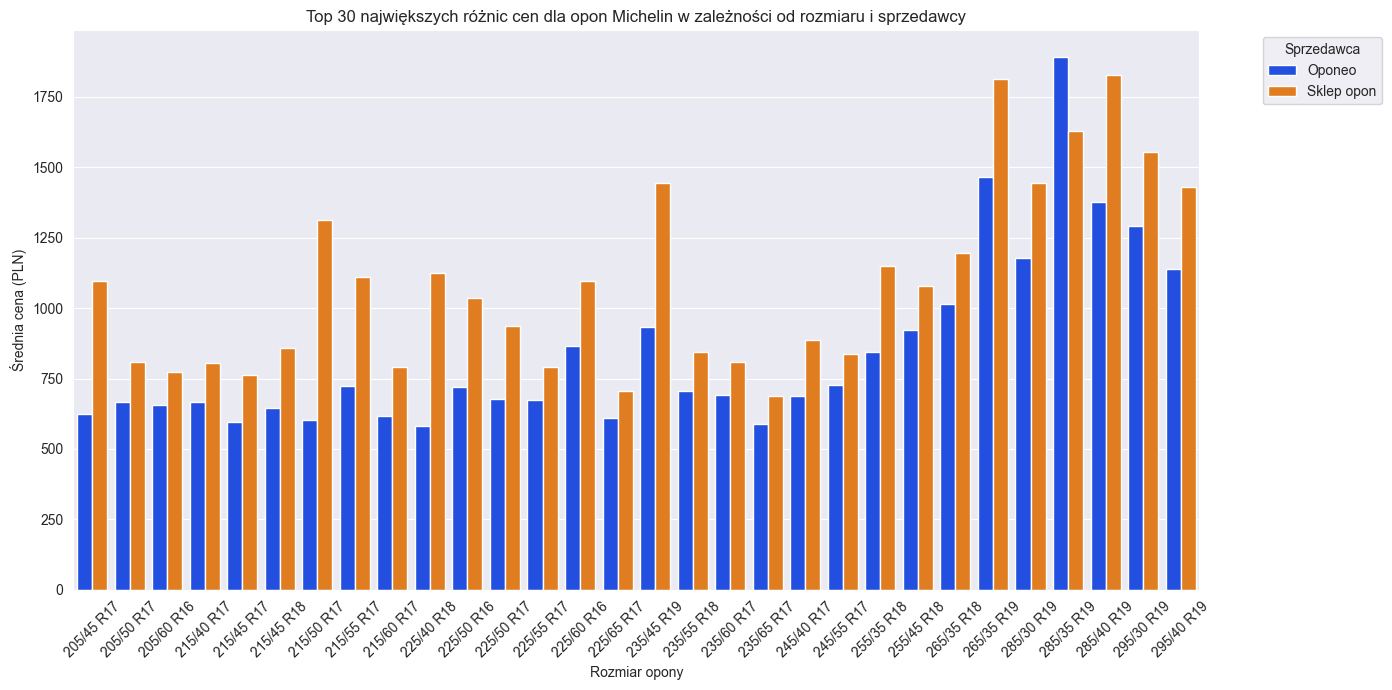

In [7]:
michelin_df = df[df['brand'] == 'Michelin']

avg_price_by_retailer_size = michelin_df.groupby(['retailer', 'size'], observed=True)['price'].mean().reset_index()

price_diff = avg_price_by_retailer_size.groupby('size', observed=True)['price'].agg(['max', 'min']).reset_index()
price_diff['diff'] = price_diff['max'] - price_diff['min']

top_30_diff = price_diff.sort_values(by='diff', ascending=False).head(30)

top_30_sizes = top_30_diff['size'].astype(str).tolist()
filtered_df = avg_price_by_retailer_size.copy()
filtered_df['size'] = filtered_df['size'].astype(str)

filtered_df.loc[:, 'size'] = pd.Categorical(filtered_df['size'], categories=top_30_sizes, ordered=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='price', hue='retailer', data=filtered_df, palette="bright")
plt.title("Top 30 największych różnic cen dla opon Michelin w zależności od rozmiaru i sprzedawcy")
plt.xlabel("Rozmiar opony")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3.3. Średnia cena opon w zależności od rozmiaru i sklepu

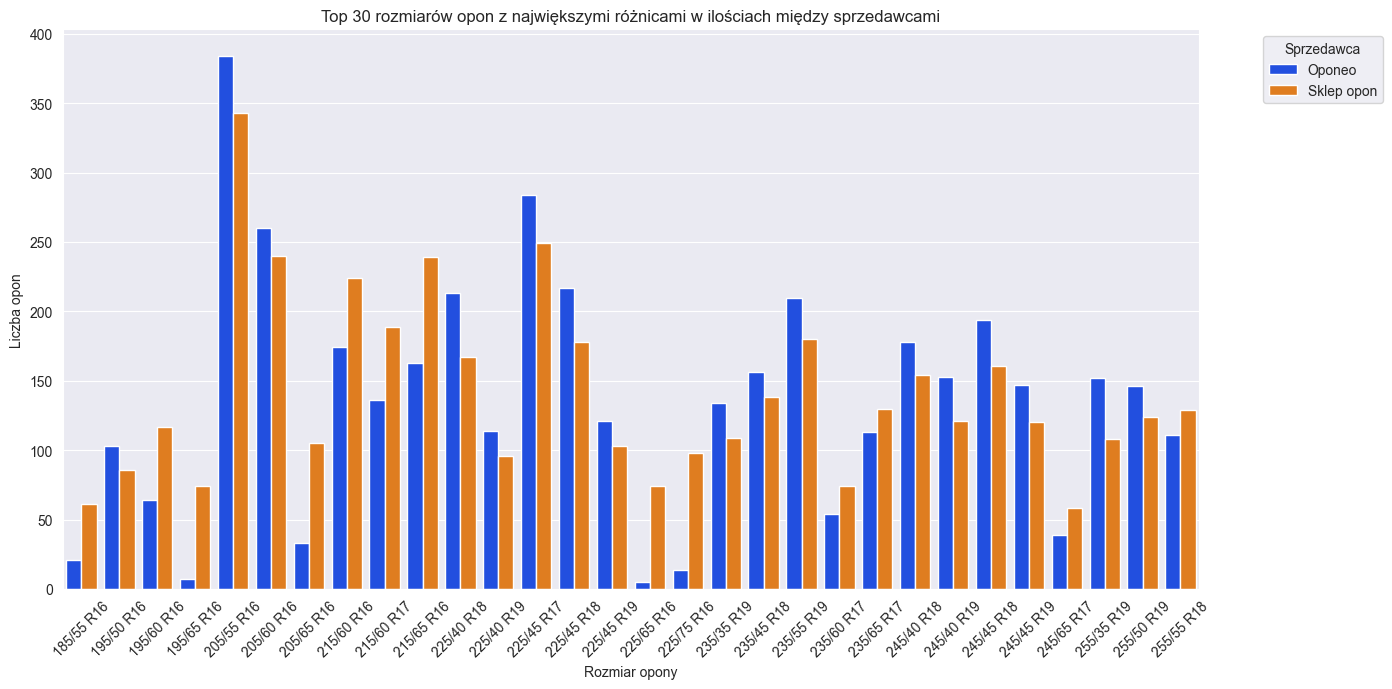

In [8]:
quantity_by_retailer_size = df.groupby(['retailer', 'size'], observed=True).size().reset_index(name='quantity')

# Krok 2: Obliczanie różnicy w ilości opon między sprzedawcami w danym rozmiarze
quantity_diff = quantity_by_retailer_size.groupby('size', observed=True)['quantity'].agg(['max', 'min']).reset_index()
quantity_diff['diff'] = quantity_diff['max'] - quantity_diff['min']

# Krok 3: Wybieranie 30 rozmiarów opon z największą różnicą ilościową
top_30_diff = quantity_diff.sort_values(by='diff', ascending=False).head(30)

# Krok 4: Wybieramy tylko dane dla tych 30 rozmiarów
top_30_sizes = top_30_diff['size'].astype(str).tolist()
filtered_df = quantity_by_retailer_size.copy()
filtered_df['size'] = filtered_df['size'].astype(str)

# Krok 5: Ustawiamy kategorię 'size' z 30 najczęstszymi rozmiarami
filtered_df.loc[:, 'size'] = pd.Categorical(filtered_df['size'], categories=top_30_sizes, ordered=True)

# Krok 6: Tworzymy wykres
plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='quantity', hue='retailer', data=filtered_df, palette="bright")

# Krok 7: Dostosowanie wykresu
plt.title("Top 30 rozmiarów opon z największymi różnicami w ilościach między sprzedawcami")
plt.xlabel("Rozmiar opony")
plt.ylabel("Liczba opon")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3.3. Średnia cena opon w zależności od klasy i sklepu

In [9]:
class_price_stats = df.groupby(['retailer', 'class'], observed=False)['price'].mean().unstack()
class_price_stats

class,Ekonomiczna,Premium,Średnia
retailer,,,
Oponeo,410.230786,709.482186,534.727127
Sklep opon,386.314343,814.549719,554.590718


### 3.4. Liczba opon w każdej klasie efektywności w obu sklepach

In [10]:
class_distribution = df.groupby(['retailer', 'class'], observed=False).size().unstack()
class_distribution

class,Ekonomiczna,Premium,Średnia
retailer,,,
Oponeo,4476,4154,2503
Sklep opon,3343,4980,2841


### 3.5. Średnia ceny opon w zależności od:
 - sklepu oraz indeksów: paliwowego, przyczepności i hałasu
 - sklepu oraz nośności
 - sklepu oraz indeksu prędkości

In [66]:
pivot_price_indices = df.pivot_table(
    values='price',
    index='retailer',
    columns=['fuel_index', 'wet_grip_index', 'noise_index'],
    aggfunc='mean',
    observed=False
)
display(pivot_price_indices)

pivot_price_speed_load = df.pivot_table(
    values='price',
    index='retailer',
    columns='speed_index',
    aggfunc='mean',
    observed=False
)
display(pivot_price_speed_load)

pivot_price_load = df.pivot_table(
    values='price',
    index='retailer',
    columns='load_index',
    aggfunc='mean',
    observed=False
)
display(pivot_price_load)

fuel_index               A                                              \
wet_grip_index           A                       B                   C   
noise_index              A           B           A           B       A   
retailer                                                                 
Oponeo          700.731707  618.043750  712.888889  683.110759  615.50   
Sklep opon      697.451364  754.759871  697.283671  759.825179  712.08   

fuel_index                                   B                          ...  \
wet_grip_index                   D           A                       B  ...   
noise_index              B       B           A           B           A  ...   
retailer                                                                ...   
Oponeo          609.476190  795.00  628.331776  621.038304  719.321839  ...   
Sklep opon      567.518824  871.05  644.835253  659.826667  597.095714  ...   

fuel_index               D                E                          \
wet_grip_index           D        E       A        B              C   
noise_index              B        B       B        B       C      A   
retailer                                                              
Oponeo          691.492647      NaN  891.00  508.400     NaN  422.0   
Sklep opon      814.986273  534.305  929.56  640.072  565.91    NaN   

fuel_index                                              
wet_grip_index                              D        E  
noise_index              B      C           B        B  
retailer                                                
Oponeo          369.324324  290.0  412.666667   896.75  
Sklep opon      435.875000    NaN  578.120000  1064.22  

[2 rows x 48 columns]

speed_index,H,N,Q,R,S,T,V,W,Y
retailer,,,,,,,,,
Oponeo,490.769573,NaN,476.333333,426.000000,586.375000,653.095745,502.975410,503.022992,634.822188
Sklep opon,575.830352,515.48,627.510000,619.100915,519.009429,581.546837,584.971605,598.342504,683.489117


load_index,80.0,81.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,...,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,121.0
retailer,,,,,,,,,,,,,,,,,,,,,
Oponeo,290.000000,382.033333,418.492308,413.620408,445.285714,457.40625,451.909385,377.927492,428.305263,512.181818,...,NaN,445.333333,561.028169,NaN,NaN,762.300000,743.500,1273.000000,694.550000,748.468085
Sklep opon,485.883333,435.969677,590.488125,503.446757,500.791250,679.25000,499.778963,569.701003,565.191686,529.373478,...,794.033694,698.220865,728.589048,925.025556,724.655,590.296364,702.418,716.441765,576.631765,645.873171


### 3.6. Porównanie:
 - cen opon w obu sklepach dla tych samych modeli
  - dostępności opon w obu sklepach dla tych samych modeli
  - ocen użytkowników opon w obu sklepach dla tych samych modeli

In [27]:
#pd.options.display.max_rows = 10
pd.options.display.max_rows = None

unique_df_price = df.groupby(['brand', 'model', 'retailer'], as_index=False)['price'].min()

df_oponeo = unique_df_price[unique_df_price['retailer'] == 'Oponeo'][['brand', 'model', 'price']].rename(columns={'price': 'Oponeo'})
df_sklep_opon = unique_df_price[unique_df_price['retailer'] == 'Sklep opon'][['brand', 'model', 'price']].rename(columns={'price': 'Sklep opon'})

price_comparison_df = pd.merge(df_oponeo, df_sklep_opon, on=['brand', 'model'], how='inner')

price_comparison_df['cheaper_in'] = price_comparison_df.apply(
    lambda row: 'Oponeo' if row['Oponeo'] < row['Sklep opon'] else 'Sklep opon' if row['Oponeo'] > row['Sklep opon'] else 'Same price',
    axis=1
)
display(price_comparison_df)

unique_df_availability = df.groupby(['brand', 'model', 'retailer'], as_index=False)['availability'].max()

df_oponeo = unique_df_availability[unique_df_availability['retailer'] == 'Oponeo'][['brand', 'model', 'availability']].rename(columns={'availability': 'Oponeo'})
df_sklep_opon = unique_df_availability[unique_df_availability['retailer'] == 'Sklep opon'][['brand', 'model', 'availability']].rename(columns={'availability': 'Sklep opon'})

availability_comparison_df = pd.merge(df_oponeo, df_sklep_opon, on=['brand', 'model'], how='inner')

availability_comparison_df['more_available_in'] = availability_comparison_df.apply(
    lambda row: 'Oponeo' if row['Oponeo'] > row['Sklep opon'] else 'Sklep opon' if row['Oponeo'] < row['Sklep opon'] else 'Taka sama dostępność',
    axis=1
)
display(availability_comparison_df)

unique_df_ratings = df.groupby(['brand', 'model', 'retailer'], as_index=False)['user_rating'].max()

df_oponeo = unique_df_ratings[unique_df_ratings['retailer'] == 'Oponeo'][['brand', 'model', 'user_rating']].rename(columns={'user_rating': 'Oponeo'})
df_sklep_opon = unique_df_ratings[unique_df_ratings['retailer'] == 'Sklep opon'][['brand', 'model', 'user_rating']].rename(columns={'user_rating': 'Sklep opon'})

rating_comparison_df = pd.merge(df_oponeo, df_sklep_opon, on=['brand', 'model'], how='inner')

rating_comparison_df['higher_rating_in'] = rating_comparison_df.apply(
    lambda row: 'Oponeo' if row['Oponeo'] > row['Sklep opon'] else 'Sklep opon' if row['Oponeo'] < row['Sklep opon'] else 'Taka sama ocena',
    axis=1
)
display(rating_comparison_df)


,brand,model,Oponeo,Sklep opon,cheaper_in
0,Apollo,Alnac 4G,353.0,291.04,Sklep opon
1,Apollo,Aspire 4G+,352.0,517.55,Oponeo
2,Arivo,Traverso ARV H/T,242.0,288.27,Oponeo
3,Barum,Bravuris 2,458.0,461.48,Oponeo
4,Barum,Bravuris 3HM,404.0,415.99,Oponeo
5,Barum,Bravuris 4x4,536.0,490.83,Sklep opon
6,Barum,Bravuris 5HM,259.0,273.78,Oponeo
7,Barum,Bravuris 6,390.0,334.90,Sklep opon
8,Bridgestone,Alenza 001,500.0,575.00,Oponeo
9,Bridgestone,Ecopia EP150,367.0,355.00,Sklep opon


,brand,model,Oponeo,Sklep opon,more_available_in
0,Apollo,Alnac 4G,medium,medium,Taka sama dostępność
1,Apollo,Aspire 4G+,medium,full,Oponeo
2,Arivo,Traverso ARV H/T,medium,medium,Taka sama dostępność
3,Barum,Bravuris 2,medium,full,Oponeo
4,Barum,Bravuris 3HM,medium,medium,Taka sama dostępność
5,Barum,Bravuris 4x4,medium,medium,Taka sama dostępność
6,Barum,Bravuris 5HM,medium,medium,Taka sama dostępność
7,Barum,Bravuris 6,full,medium,Sklep opon
8,Bridgestone,Alenza 001,medium,medium,Taka sama dostępność
9,Bridgestone,Ecopia EP150,medium,medium,Taka sama dostępność


,brand,model,Oponeo,Sklep opon,higher_rating_in
0,Apollo,Alnac 4G,5.6,5.2,Oponeo
1,Apollo,Aspire 4G+,5.7,0.0,Oponeo
2,Arivo,Traverso ARV H/T,5.5,0.0,Oponeo
3,Barum,Bravuris 2,NaN,4.8,Taka sama ocena
4,Barum,Bravuris 3HM,5.6,5.2,Oponeo
5,Barum,Bravuris 4x4,5.4,5.3,Oponeo
6,Barum,Bravuris 5HM,6.0,5.2,Oponeo
7,Barum,Bravuris 6,5.5,0.0,Oponeo
8,Bridgestone,Alenza 001,5.8,5.5,Oponeo
9,Bridgestone,Ecopia EP150,4.3,5.0,Sklep opon


# 4. Wizualizacja danych

### 4.1. Średnia cena:
- w zależności od sklepu
- w zależności od marki i sklepu

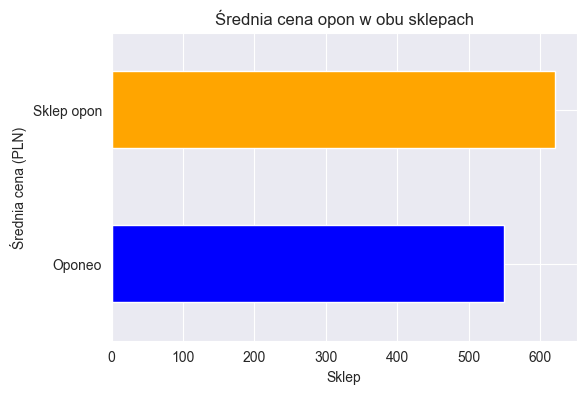

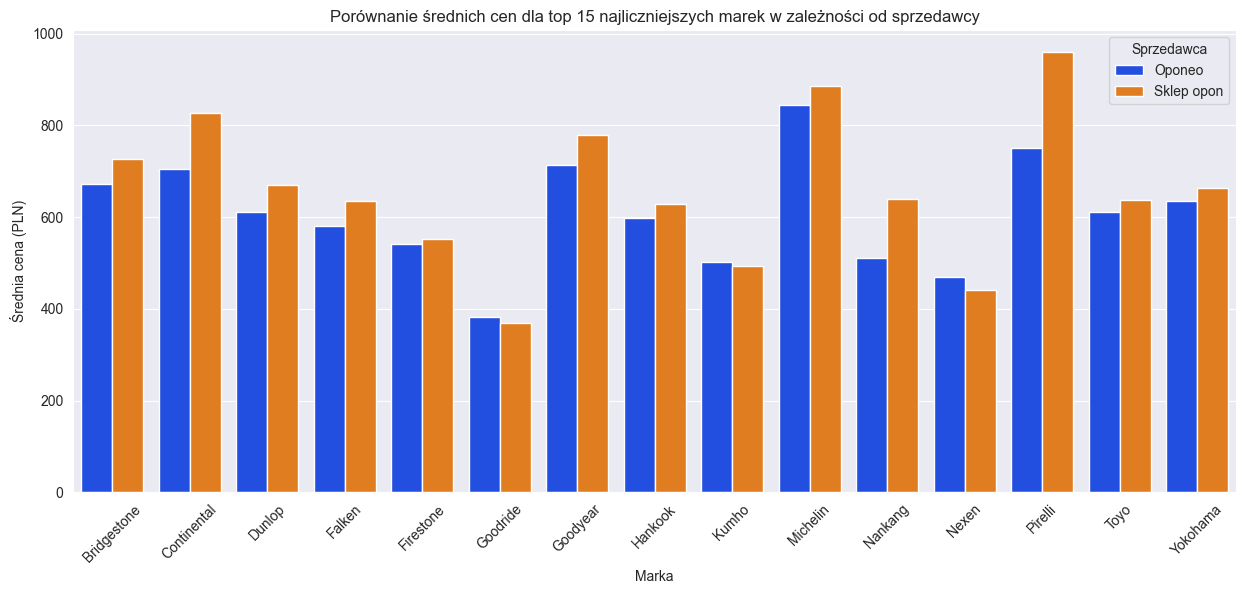

In [28]:
avg_price_by_source = df.groupby('retailer')['price'].mean()
plt.figure(figsize=(6, 4))
avg_price_by_source.plot(kind='barh', color=['blue', 'orange'])
plt.title("Średnia cena opon w obu sklepach")
plt.ylabel("Średnia cena (PLN)")
plt.xlabel("Sklep")
plt.show()

top_15_brands = df['brand'].value_counts().nlargest(15).index
df_top_brands = df[df['brand'].isin(top_15_brands)]
avg_price_by_brand_retailer = df_top_brands.groupby(['brand', 'retailer'])['price'].mean().reset_index()
plt.figure(figsize=(15, 6))
# custom_hex_palette = sns.color_palette(["#66b3ff", "#99ff99"])
# sns.barplot(x='brand', y='price', hue='retailer', data=avg_price_by_brand_retailer, palette=custom_hex_palette)
sns.barplot(x='brand', y='price', hue='retailer', data=avg_price_by_brand_retailer, palette="bright")
plt.title("Porównanie średnich cen dla top 15 najliczniejszych marek w zależności od sprzedawcy")
plt.xlabel("Marka")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca")
plt.show()

### 4.2. Rozkład:
- indeksu efektywności paliwowej w zależności od sklepu
- indeksu przyczepności na mokrej nawierzchni w zależności od sklepu
- poziomu hałasu w zależności od sklepu
- klas opon w zależności od sklepu

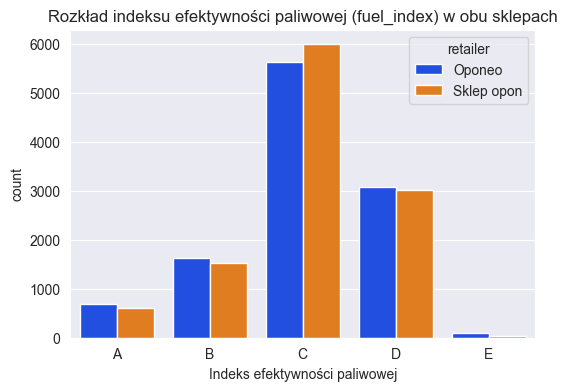

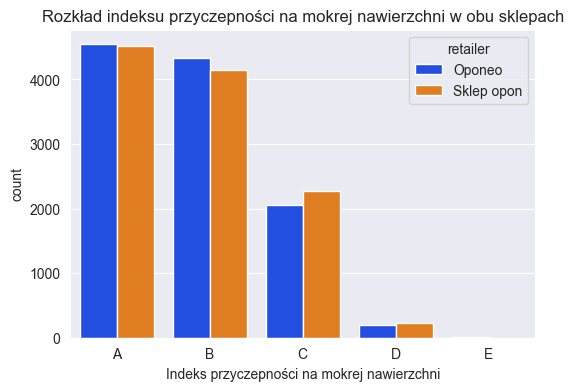

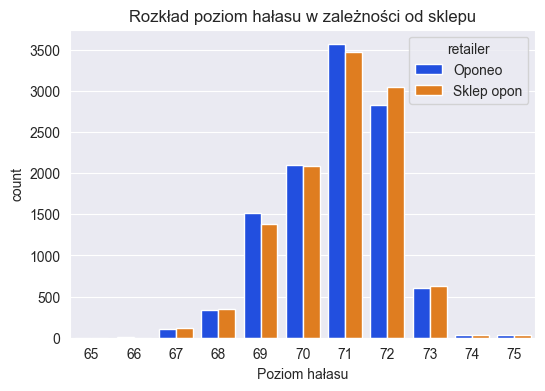

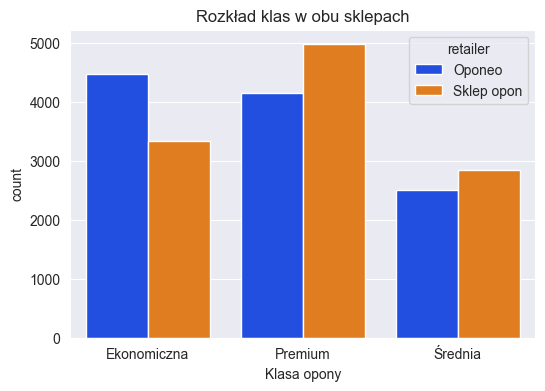

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fuel_index', hue='retailer', data=df, palette='bright')
plt.title("Rozkład indeksu efektywności paliwowej (fuel_index) w obu sklepach")
plt.xlabel("Indeks efektywności paliwowej")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='wet_grip_index', hue='retailer', data=df, palette='bright')
plt.title("Rozkład indeksu przyczepności na mokrej nawierzchni w obu sklepach")
plt.xlabel("Indeks przyczepności na mokrej nawierzchni")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='noise_level', hue='retailer', data=df, palette='bright')
plt.title("Rozkład poziom hałasu w zależności od sklepu")
plt.xlabel("Poziom hałasu")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='retailer', data=df, palette='bright')
plt.title("Rozkład klas w obu sklepach")
plt.xlabel("Klasa opony")
plt.show()


### 4.3. Korelacja parametrów
- cena
- klasa
- ocena użytkownika
- poziom hałasu
- indeks efektywności paliwowej
- indeks przyczepności na mokrej nawierzchni

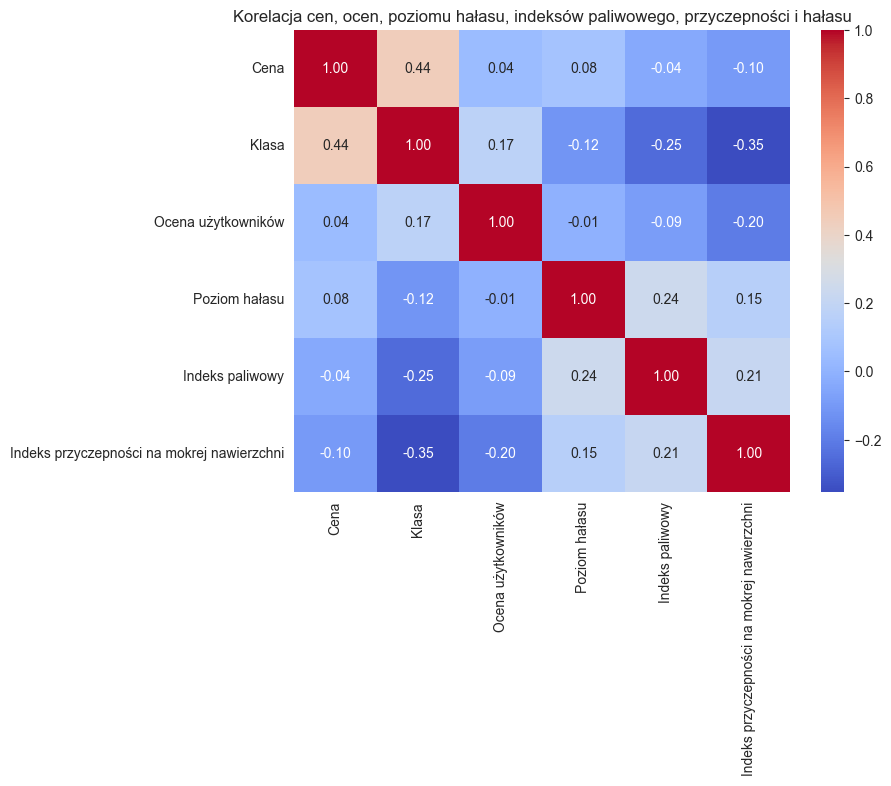

In [30]:
def class_to_int(cls):
    return {'Premium': 3, 'Średnia': 2, 'Ekonomiczna': 1}.get(cls, 0)

def letter_to_int(letter):
    return ord(letter.upper()) - ord('A') + 1

df['fuel_index_int'] = df['fuel_index'].apply(letter_to_int)
df['wet_grip_index_int'] = df['wet_grip_index'].apply(letter_to_int)
df['class_int'] = df['class'].apply(class_to_int)

df_heat_columns = df.rename(columns={
    'price': 'Cena',
    'class_int': 'Klasa',
    'user_rating': 'Ocena użytkowników',
    'noise_level': 'Poziom hałasu',
    'fuel_index_int': 'Indeks paliwowy',
    'wet_grip_index_int': 'Indeks przyczepności na mokrej nawierzchni'
})
correlation = df_heat_columns[['Cena', 'Klasa', 'Ocena użytkowników', 'Poziom hałasu', 
                          'Indeks paliwowy', 'Indeks przyczepności na mokrej nawierzchni']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacja cen, ocen, poziomu hałasu, indeksów paliwowego, przyczepności i hałasu")
plt.show()

### 4.4. 15 najliczniejszych marek opon w zbiorze danych

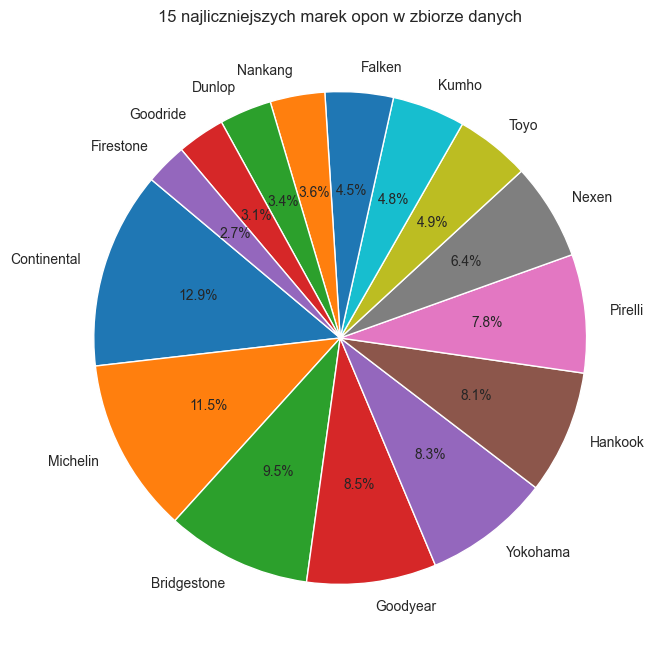

In [31]:
import matplotlib.pyplot as plt

top_15_brands = df['brand'].value_counts().nlargest(15)

plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # Paleta 10 różnych kolorów
plt.pie(top_15_brands, labels=top_15_brands.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('15 najliczniejszych marek opon w zbiorze danych')
plt.show()


# 5. Porównanie i wnioski

## Kluczowe różnice między sklepami
### Cena:
- Średnia cena opon w Sklepie Opon jest nieco wyższa w porównaniu do Oponeo.
- W przypadku tych samych modeli opon, Oponeo oferuje niższe ceny, co czyni go bardziej opłacalną opcją dla klientów dbających o budżet.
### Cechy opon:
- Sklep Opon ma większy udział opon premium 
- Oponeo ma bardziej zrównoważoną ofertę opon premium, średniej klasy i ekonomicznych.
### Różnorodność oferty:
- Sklep Opon ma większy wybór wysokiej klasy marek i modeli.
- Oponeo zapewnia szerszą gamę opcji w różnych przedziałach cenowych, zaspokajając potrzeby szerszego grona odbiorców.
### Oceny użytkowników:
- Dla tych samych modeli opon, oceny użytkowników są wyższe w Oponeo w porównaniu do Sklep Opon.
- Sugeruje to, że klienci są bardziej zadowoleni z zakupów w Oponeo.
### Wnioski i rekomendacje:
- **Najlepszy stosunek jakości do ceny**: Oponeo oferuje lepszy stosunek jakości do ceny.<br>
- **Opcje premium**: Dla klientów poszukujących opon premium z wysokiej klasy funkcjami, Sklep Opon jest lepszą opcją.<br>
- **Ogólna rekomendacja**: W zależności od potrzeb i budżetu klienta, oba sklepy mają swoje mocne strony. Oponeo jest polecany ze względu na opłacalność i różnorodność, podczas gdy Sklep Opon jest idealny dla osób poszukujących opon premium.<br>
